___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>

<center><em>Copyright: Pierian Data Inc.</em></center>

_____
# Portfolio Optimization

### Choosing optimal holding ratios based on volatility tolerance

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper [“Portfolio Selection](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf),” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

We already know we can calculate average returns and the volatility of a stock. We can also use the ratio between these two (along with the risk-free rate of return) .

But what if we want a portfolio of multiple stocks, how much of our cash should we put into each holding. Evenly split it between the securities? Is there a way to use historical data to indicate how we should weigh our holdings? If so, is there an optimal weighting based on history?

Here is the general idea Markowitz had:
***We can use historical returns and volatility data to decide on how much we should weigh each holding in our portfolio. We want to choose an optimal weighting that maximizes returns vs. the risk we are willing to take.***

There are different ways of coming up with these optimal weightings. Let's try the simplest method first, equally weighing all the potential holdings.

# Equal Weighted Holdings

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Basket of Stocks in Retail Stores

If we wanted to invest in a variety of retail based companies, how should we weigh our holdings? Let's first explore equal weighted holdings:

In [2]:
# COSTCO
COST = pd.read_csv("COST.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# WALMART 
WMT = pd.read_csv("WMT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# TARGET
TGT = pd.read_csv("TGT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# DOLLAR GENERAL
DG = pd.read_csv("DG.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

<Axes: xlabel='Date'>

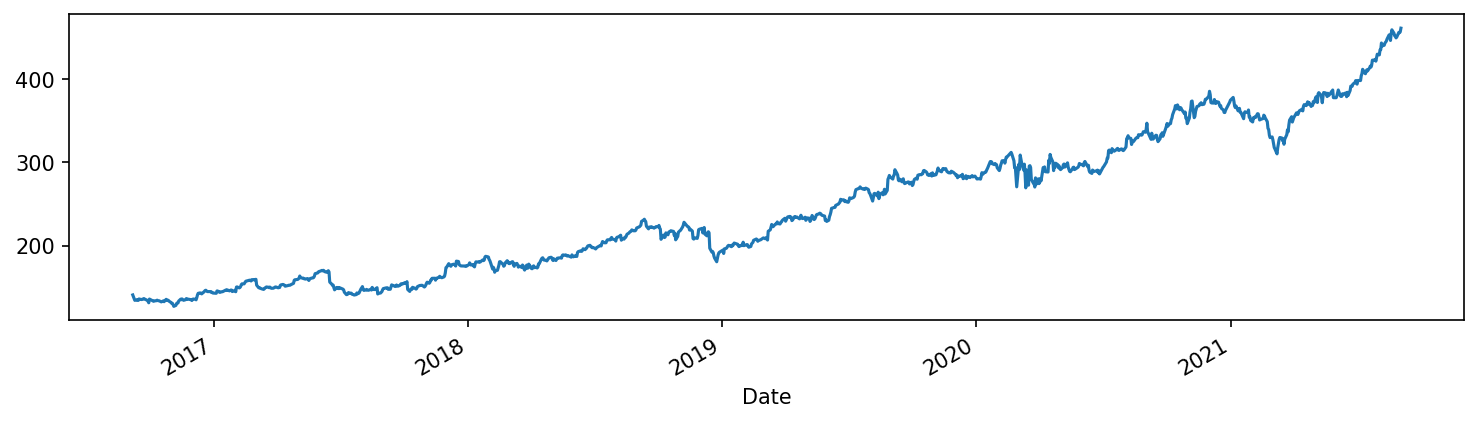

In [3]:
plt.figure(dpi=150)
COST.plot(figsize=(12,3))

Combine into one DataFrame:

In [4]:
retail = pd.concat([COST,WMT,TGT,DG],axis=1)
# Make sure to rename columns rather than just all "adjusted close"
retail.columns = ['COST','WMT','TGT','DG']

In [5]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


### Daily Returns

Let's get the daily returns of each company:

In [6]:
retail_returns = retail.pct_change(1).dropna()

In [7]:
retail_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


<Axes: xlabel='Date'>

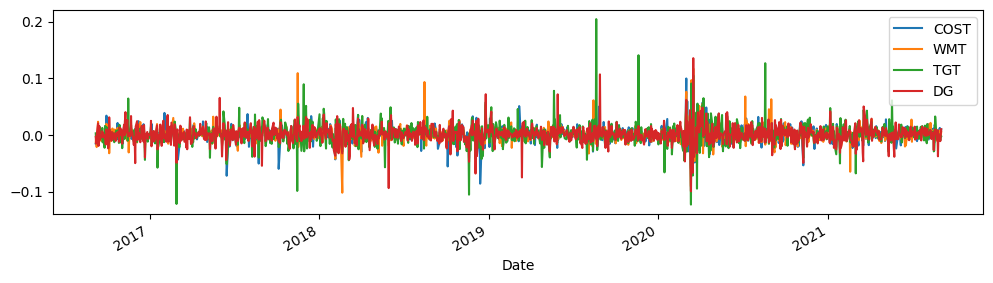

In [8]:
retail_returns.plot(figsize=(12,3))

<Axes: ylabel='Frequency'>

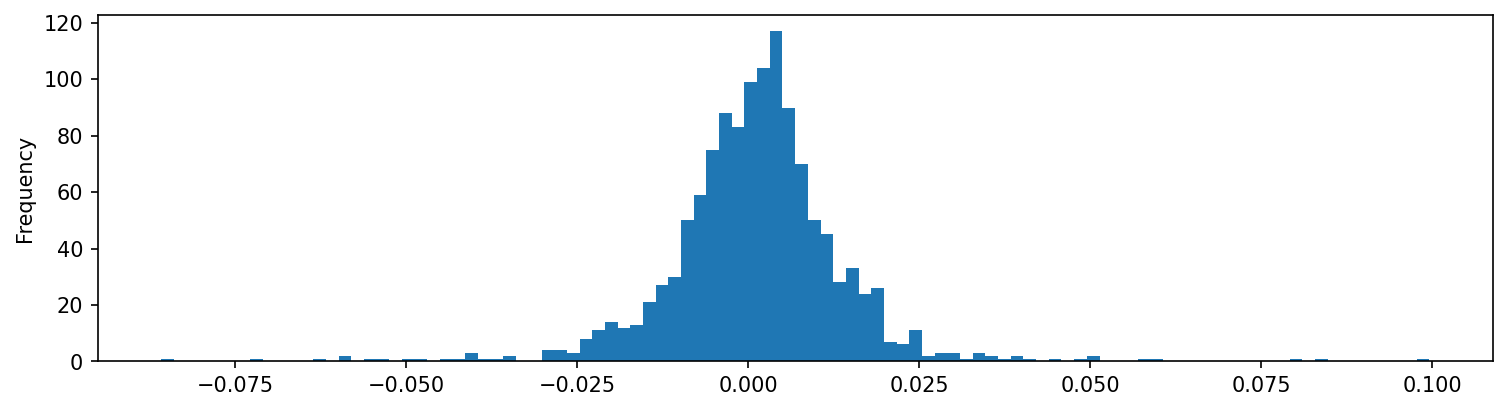

In [9]:
plt.figure(dpi=150)
retail_returns['COST'].plot(kind='hist',bins=100,figsize=(12,3))

#### Cummulative Return

In [10]:
(1 + retail_returns['COST']).cumprod() - 1 

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COST, Length: 1257, dtype: float64

In [11]:
cumul_return = (1 + retail_returns['COST']).cumprod() - 1

In [12]:
cumul_return_perc = cumul_return*100

Text(0, 0.5, 'Cumulative Return as %')

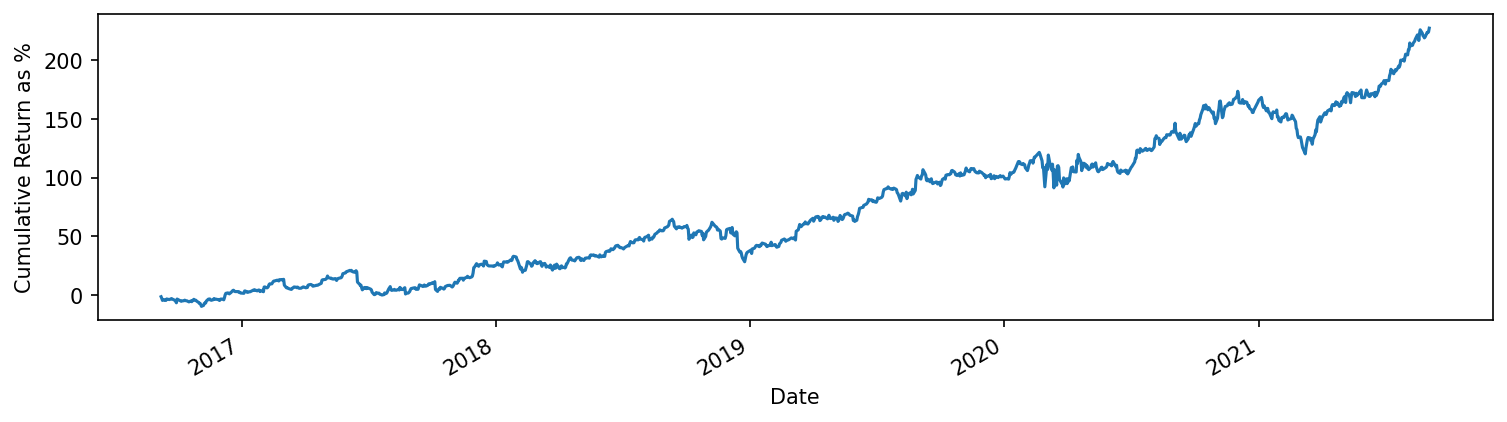

In [13]:
plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(12,3))
plt.ylabel("Cumulative Return as %")

### Weighted Returns

We can calculate the returns based on a weighting by using the dot product.

In [14]:
np.dot([2,3],[10,20])

80

In [15]:
 example_returns = np.array([1,0.5]) # 100% and 50% returns

In [16]:
weights = [1,0]
np.dot(weights,example_returns)

1.0

In [17]:
weights = [0.5,0.5]
np.dot(weights,example_returns)

0.75

Now let's apply this to our dataframe of returns, which we will transpose for dimension matching on the 1-D weight vector dot against the DataFrame of returns:

In [18]:
retail_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [19]:
np.dot([1,0,0,0],retail_returns.transpose())

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [20]:
np.dot([0.5,0,0.5,0],retail_returns.transpose())

array([-0.00622867, -0.01294575, -0.01233565, ..., -0.00525476,
       -0.00010427,  0.00373735])

**1/N Weighting**

In [21]:
N = len(retail_returns.columns)
equal_weights = N * [1/N] # Shows 1/4, 4 times. Its not multiplication, but repetition! 4*["A"]

In [22]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [23]:
equal_returns = np.dot(equal_weights,retail_returns.transpose())

In [24]:
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [25]:
cum_equal_returns =   (1 + equal_returns).cumprod() - 1

In [26]:
cum_equal_returns

array([-0.00720156, -0.01815581, -0.02975273, ...,  2.32411376,
        2.32132463,  2.34037771])

In [27]:
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = retail_returns.index

<Axes: xlabel='Date'>

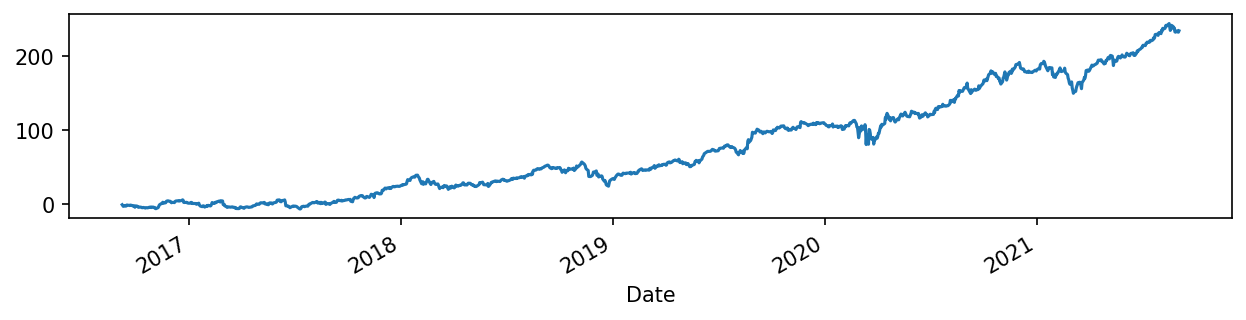

In [28]:
plt.figure(dpi=150)
cum_equal_returns_perc.plot(figsize=(10,2))

**Which is better, equally weighted, or all in on COSTCO?**

**Cummulative Return:**

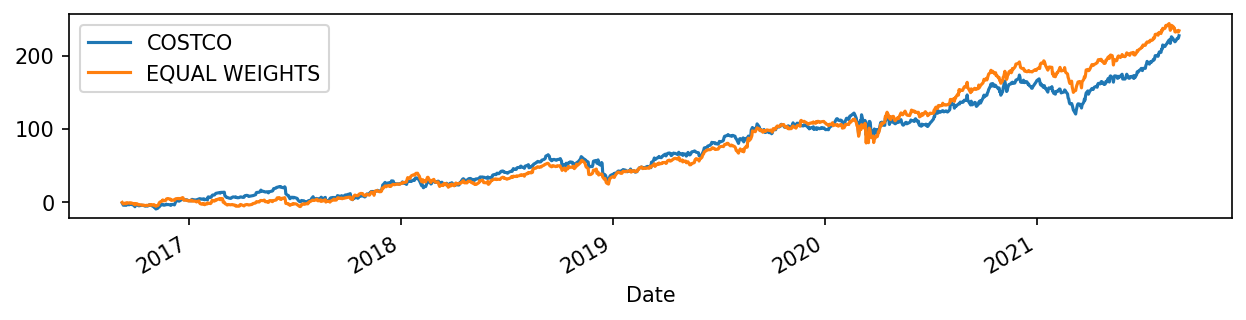

In [29]:
plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(10,2),label='COSTCO')
cum_equal_returns_perc.plot(figsize=(10,2),label='EQUAL WEIGHTS')
plt.legend()

# Monte Carlo Simulation for Optimization Search

Let's try randomly sampling different weights of portfolios and then map out and plot their returns, risk, and Sharpe Ratios. Then we will be able to visually pick our desired weighting, keep in mind, the down side here is that we will need o simulate many, many variations!

#### Why use Log Returns?

As we've already seen, the benefit of using returns, versus prices, is **normalization**: allowing us to measure all variables in a comparable metric, thus enabling evaluation of analytic relationships amongst two or more variables despite originating from price series of unequal values. 

When considering the best weighting, will we only look at mean and variance, which means we are assuming a normal distribution of returns. But how can we get these, log-normality: if we assume that prices are distributed log normally (which, in practice, may or may not be true for any given price series), then **log(1 + r_i)** is normally distributed!

In [30]:
retail/retail.shift(1)

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [31]:
# np.log(1+retail.pct_change(1)) # <-- this is the same thing
# Log Returns as Percent of next day
log_rets = np.log(retail/retail.shift(1))

In [32]:
log_rets

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [33]:
# Notice how close this is to our original returns!
retail.pct_change(1)

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


#### Generating Random Weights

Let's see how we can use numpy to generate random weightings to test:

In [34]:
N = len(retail.columns)

weights = np.random.random(N)

In [35]:
weights

array([0.92737592, 0.56337167, 0.72752221, 0.77226274])

In [36]:
# They need to sum up to 1!
weights = weights/ np.sum(weights)

In [37]:
weights

array([0.31010394, 0.18838507, 0.24327514, 0.25823586])

In [38]:
np.sum(weights)

1.0

In [39]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

Now we just need two functions, one that gives the returns for a specific weighting and another that reports back the volatility for a specific weighting.

#### Portfolio Returns Function

In [40]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 #Annualized Returns

#### Portfolio Volatility (Variance) Function

Note how we are now calculating the variance for an entire portfolio, not just a single stock's standard deviation or variance. We can calculate this with the Expected Portfolio Variance Equation using covariance: https://www.investopedia.com/terms/p/portfolio-variance.asp

In [41]:
log_rets.cov()

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [42]:
log_rets_cov = log_rets.cov()

In [43]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [44]:
calculate_volatility(weights,log_rets_cov)

0.19594068066654988

Now we just create many, many random weightings, and we can then plot them on expected return vs. expected volatility (coloring them by Sharpe Ratio):

In [45]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

In [46]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [47]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

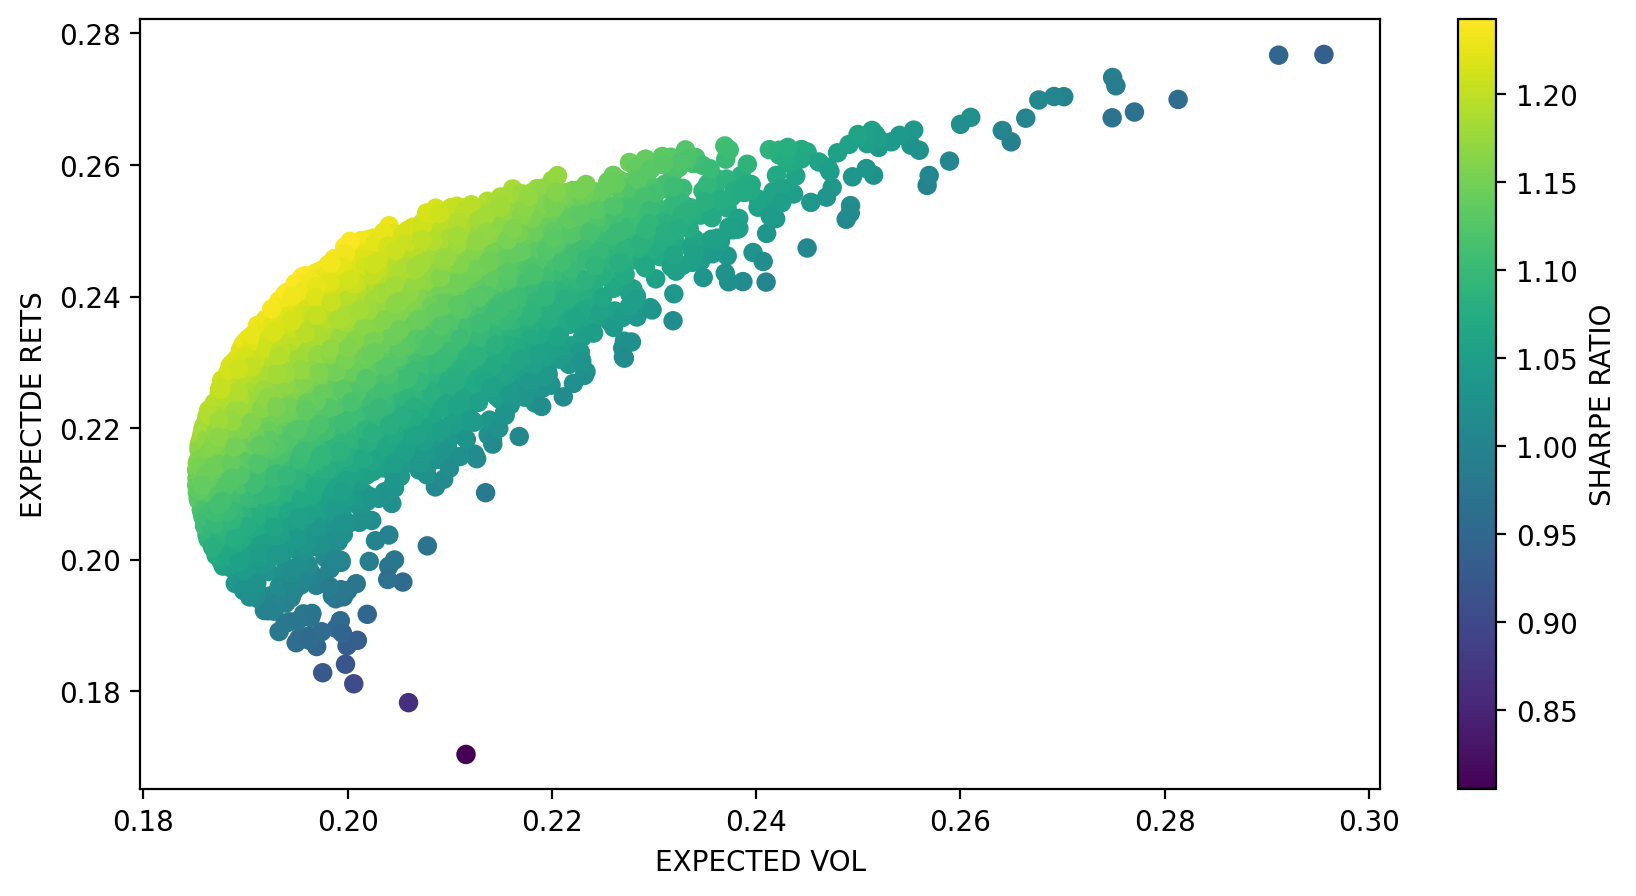

In [48]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [49]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.55916537, 0.03430423, 0.17689523, 0.22963518])

# Optimal Weighting through Minimization Search

Using Sharpe Ratio as our guide, let's find the weights that optimize for the Sharpe Ratio using Scipy's minimize function tool!

In [50]:
from scipy.optimize import minimize

In [51]:
# help(minimize)

In [52]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [53]:
bounds = tuple((0,1) for n in range(N))

In [54]:
# Bound for each weighting (we only go long)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [55]:
# Starting Guess
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [56]:
# Need to constrain all weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [57]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.245126777621998
       x: [ 5.846e-01  2.385e-17  1.768e-01  2.386e-01]
     nit: 4
     jac: [-3.517e-04  5.834e-02  1.120e-03  3.204e-05]
    nfev: 20
    njev: 4

In [58]:
np.sum(np.array([0.58456807, 0.        , 0.17679024, 0.2386417 ]))

1.00000001

In [59]:
retail.columns

Index(['COST', 'WMT', 'TGT', 'DG'], dtype='object')

<Axes: xlabel='Date'>

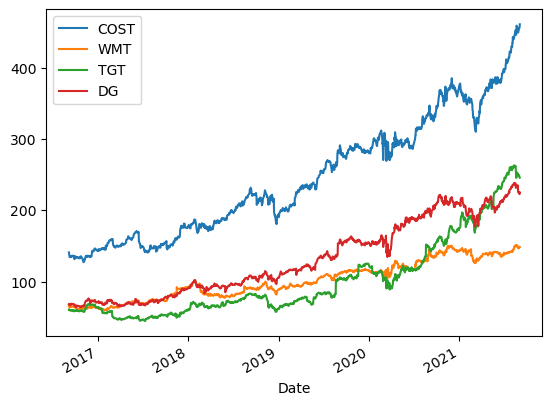

In [60]:
retail.plot()

## Efficient Frontier

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier: https://en.wikipedia.org/wiki/Efficient_frontier

In [61]:
expected_returns_range = np.linspace(0.18,0.28,100)

In [62]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [63]:
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

Now loop for different expected returns:

In [64]:
frontier_volatility = []

for possible_return in expected_returns_range:
    # function for return
    
    
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])

### Plot Frontier

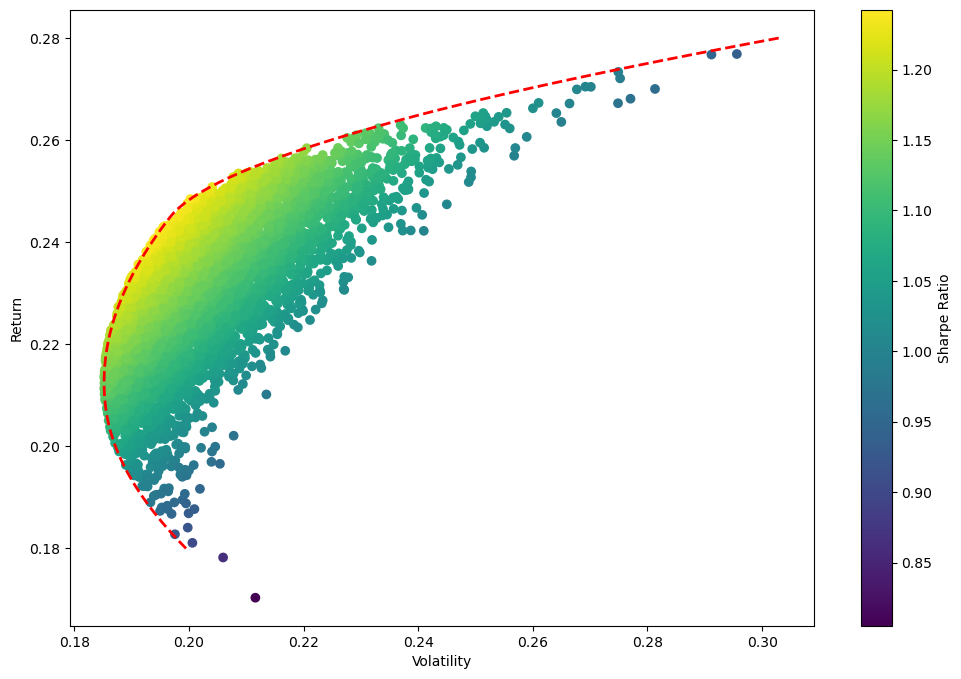

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)